In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='retina'
 
from __future__ import absolute_import, division, print_function
 
import sys
import os
 
import pandas as pd
import numpy as np
 
# TSA from Statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
 
# Display and Plotting
import matplotlib.pylab as plt
import seaborn as sns
 
pd.set_option('display.float_format', lambda x: '%.5f' % x) # pandas
np.set_printoptions(precision=5, suppress=True) # numpy
 
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
 
# seaborn plotting style
sns.set(style='ticks', context='poster')

In [2]:
filename_ts = 'data.csv'
ts_df = pd.read_csv(filename_ts, index_col=0, parse_dates=[0])
 
n_sample = ts_df.shape[0]

In [3]:
print(ts_df.shape)
print(ts_df.head())

(1763, 6)
                  open        high         low       close  volume   \
data                                                                  
2015-01-02 17823.07000 17951.78000 17731.30000 17832.99000        0   
2015-01-05 17821.30000 17821.30000 17475.93000 17501.65000        0   
2015-01-06 17504.18000 17581.05000 17262.37000 17371.64000        0   
2015-01-07 17374.78000 17597.08000 17374.78000 17584.52000        0   
2015-01-08 17591.97000 17916.04000 17591.97000 17907.87000        0   

           changepercent  
data                      
2015-01-02         0.06%  
2015-01-05        -1.86%  
2015-01-06        -0.74%  
2015-01-07         1.23%  
2015-01-08         1.84%  


In [5]:
#置信区间
n_train=int(0.95*n_sample)+1
n_forecast=n_sample-n_train
#ts_df
ts_train = ts_df.iloc[:n_train]['close']
ts_test = ts_df.iloc[n_train:]['close']
print(ts_train.shape)
print(ts_test.shape)
print("Training Series:", "\n", ts_train.tail(), "\n")
print("Testing Series:", "\n", ts_test.head())

(1675,)
(88,)
Training Series: 
 data
2021-08-20   35120.08000
2021-08-23   35335.71000
2021-08-24   35366.26000
2021-08-25   35405.50000
2021-08-26   35213.12000
Name: close, dtype: float64 

Testing Series: 
 data
2021-08-27   35455.80000
2021-08-30   35399.84000
2021-08-31   35360.73000
2021-09-01   35312.53000
2021-09-02   35443.82000
Name: close, dtype: float64


In [6]:
def tsplot(y, lags=None, title='', figsize=(14, 8)):
     
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax   = plt.subplot2grid(layout, (0, 0))
    hist_ax = plt.subplot2grid(layout, (0, 1))
    acf_ax  = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
     
    y.plot(ax=ts_ax)
    ts_ax.set_title(title)
    y.plot(ax=hist_ax, kind='hist', bins=25)
    hist_ax.set_title('Histogram')
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    [ax.set_xlim(0) for ax in [acf_ax, pacf_ax]]
    sns.despine()
    fig.tight_layout()
    return ts_ax, acf_ax, pacf_ax

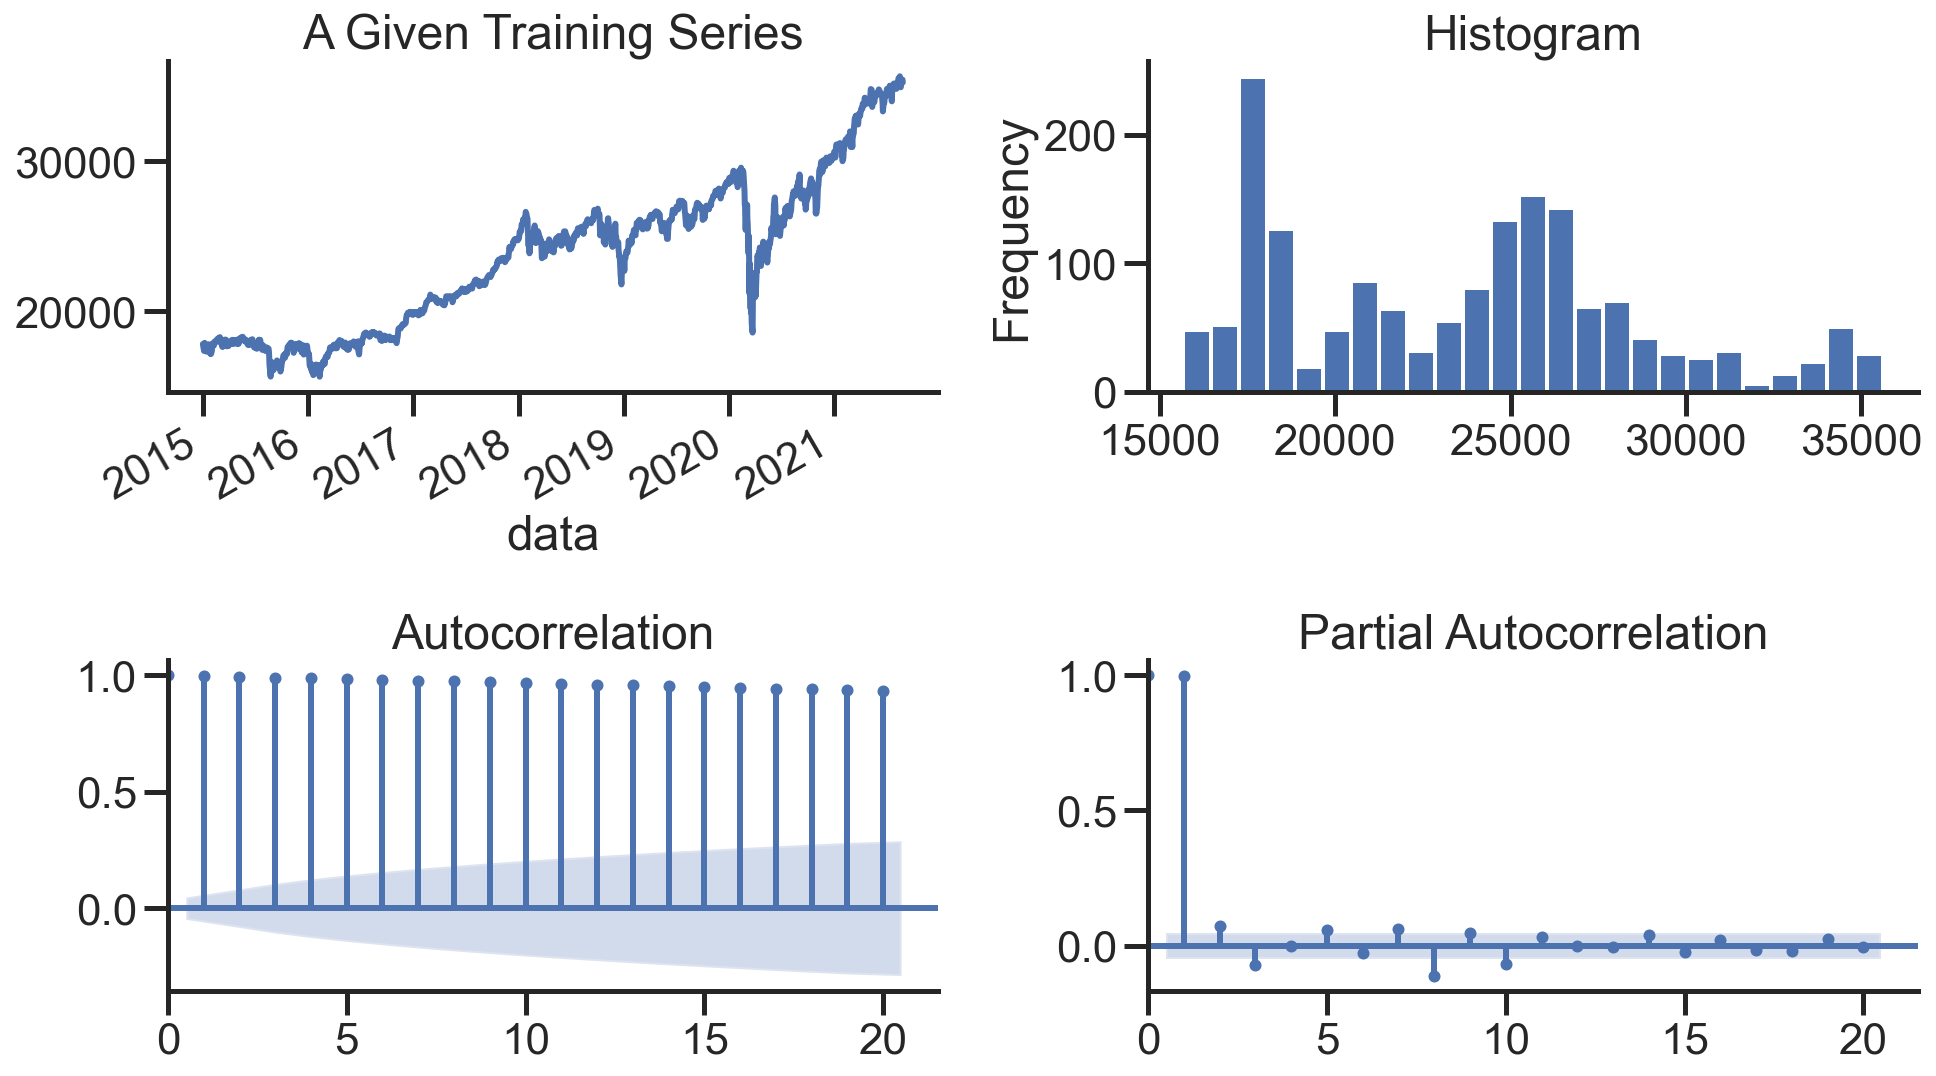

In [7]:
tsplot(ts_train, title='Training Data', lags=20);